# ZOOM IN STACKED PERIODOGRAMS

This notebook allows to draw figures zooming in at different parts of a stacked periodogram (or, in general, of any periodogram with an OR and AND column).

## Modules and configuration

### Modules

In [1]:
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white", {'figure.figsize':(15,10)})

### Configuration

In [6]:
DATA_FILE = "./PG_subsample_TESS_StackedPg/results/PG_subsample_TESS_RV_StackedPg_CORRECTED_StackedPG.dat"

IMG_FOLDER = './img/'

### Functions

In [7]:
def plot_pg(data, x, y, frec_lim=None, fig_title=None, fig_filename=None):
    plt.figure(figsize=(10,7))
    ax = sns.lineplot(data, x=x, y=y)
    if fig_title is None:
        ax.set_title("Periodogram", fontsize=16)
    else:
        ax.set_title(fig_title, fontsize=16)
    if frec_lim is None:
        pass
    else:
        ax.set_xlim(frec_lim)
    if fig_filename is None:
        pass
    else:
        plt.savefig(fig_filename, format='jpg')
    plt.plot();
    


## Load data

In [8]:
DATA_FILE

'./PG_subsample_TESS_StackedPg/results/PG_subsample_TESS_RV_StackedPg_CORRECTED_StackedPG.dat'

In [9]:
df = pd.read_csv(DATA_FILE, sep=' ', decimal='.')
df

,#frec,AND,OR
0,2.400,NaN,0.040045
1,2.403,NaN,0.038464
2,2.406,NaN,0.036205
3,2.409,NaN,0.033455
4,2.412,NaN,0.030486
...,...,...,...
95196,287.988,NaN,0.004796
95197,287.991,NaN,0.004926
95198,287.994,NaN,0.005122
95199,287.997,NaN,0.006123


In [10]:
df.rename(columns={'#frec': 'Frequency [$d^{-1}$]', 'OR': 'Normalized stacked power (OR)'}, inplace=True)
df

,Frequency [$d^{-1}$],AND,Normalized stacked power (OR)
0,2.400,NaN,0.040045
1,2.403,NaN,0.038464
2,2.406,NaN,0.036205
3,2.409,NaN,0.033455
4,2.412,NaN,0.030486
...,...,...,...
95196,287.988,NaN,0.004796
95197,287.991,NaN,0.004926
95198,287.994,NaN,0.005122
95199,287.997,NaN,0.006123


## Draw data

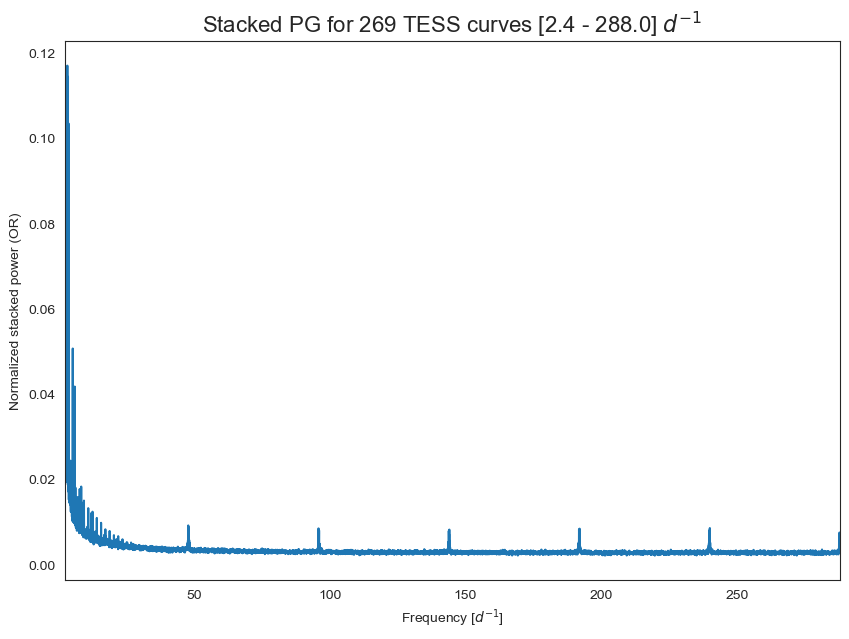

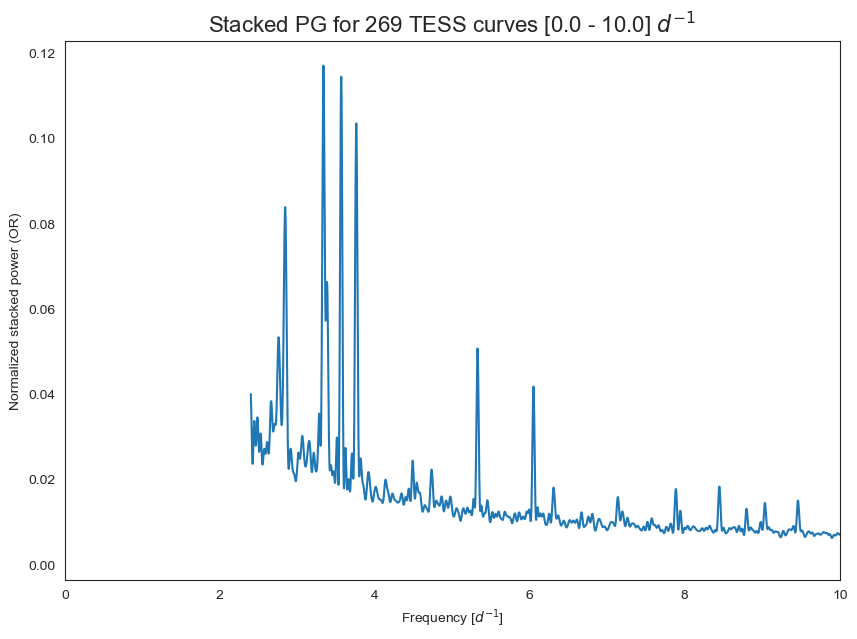

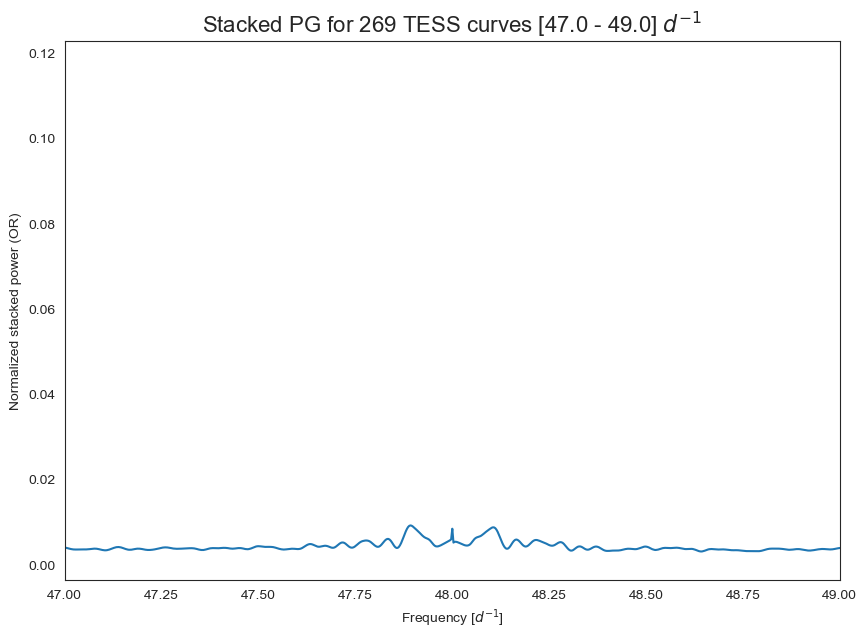

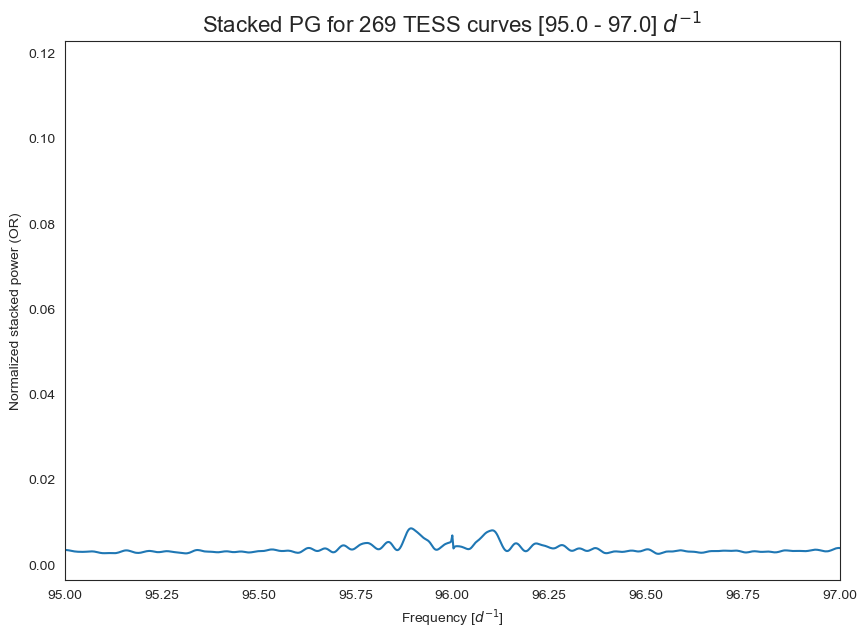

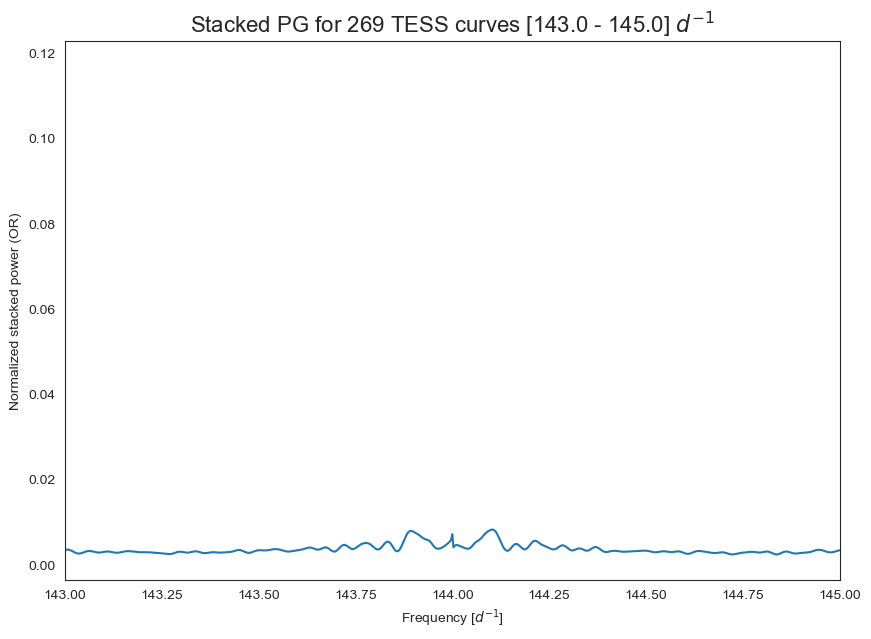

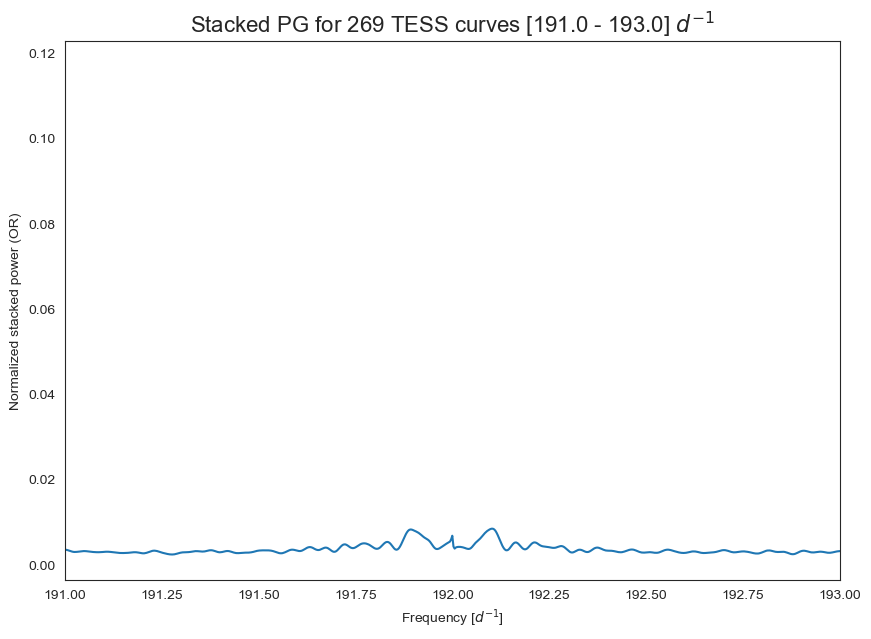

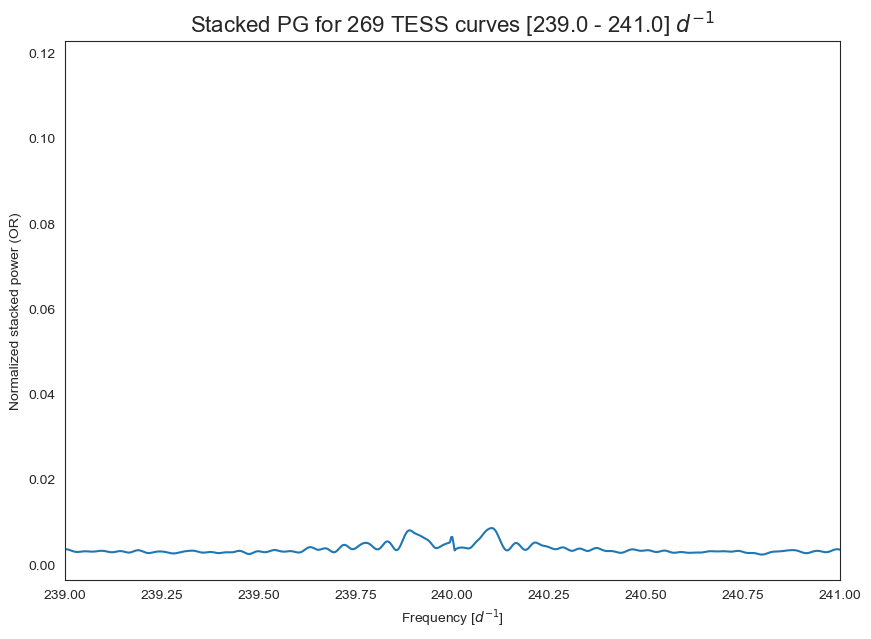

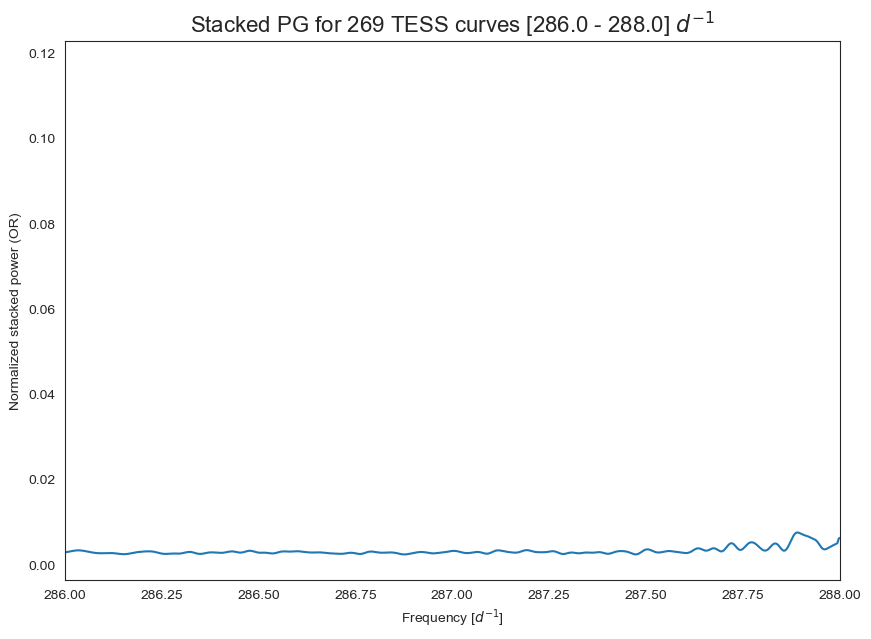

In [13]:
frec_lims = [(2.4, 288), (0, 10), (47, 49), (95, 97), (143, 145), (191, 193), (239, 241), (286, 288)]
data = df
x = 'Frequency [$d^{-1}$]'
y = 'Normalized stacked power (OR)'
for frec_lim in frec_lims:
    fig_filename = IMG_FOLDER + "TESS_StackedPG_CORRECTED_%.1f_to_%.1f.jpg" %frec_lim
    fig_title = "Stacked PG for 269 TESS curves [%.1f - %.1f] $d^{-1}$" %frec_lim
    plot_pg(data=data, x=x, y=y, frec_lim=frec_lim,
            fig_title=fig_title,
            fig_filename=fig_filename)
